<a href="https://colab.research.google.com/github/luckycontrol/DeepLearning_tensorflow/blob/main/03_%EC%B6%9C%EB%A0%A5%EC%B8%B5_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소프트맥스 사용해보기

In [ ]:
import numpy as np

# 소프트맥스 함수 사용해보기

a = np.array([0.3, 2.9, 4.0]) # 출력층 뉴런이 3개

# numpy exp는 밑이 e(자연상수)인 지수함수로 만든다.
exp_a = np.exp(a) # 모든 입력값에 대해 지수함수 적용 - 분자

sum_exp_a = sum(np.exp(a)) # 분모 구하기

# 신경망의 최종 예측
y = exp_a / sum_exp_a

print(y) # 각각의 확률
print(np.sum(y)) # 전체는 1

# 입력값의 크기순서와 출력값의 크기순서가 같다 = 단조함수.


[0.01821127 0.24519181 0.73659691]
1.0


In [ ]:
# 함수로 구현한 소프트맥스 ( 나쁜버전 )
def softmax(a):
  exp_a = np.exp(a) # 분자
  sum_exp_a = sum(np.exp(a)) # 분모

  y = exp_a / sum_exp_a # 나누기
  return y

In [ ]:
# 왜 나쁠까? - 지수함수는 큰 값을 너무 크게 만든다.
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

# 따라서 튜닝을 해야한다. 어떻게? - 로그를 씌워서.

[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


개선된 softmax 구현하기

In [ ]:
# 튜닝을 하기위한 상수 c
c = np.max(a) # c는 입력값의 제일 큰 값으로 하는 것이 일반적
print(a-c)

[  0 -10 -20]


In [ ]:
# a-c를 softmax 함수에 적용한다.
print(np.exp(a-c) / np.sum(np.exp(a-c))) # a-c는 a + log(c)와 같다.

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [ ]:
# 튜닝된 소프트맥스 함수
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a)
  sum_exp_a = np.sum(np.exp(a))

  y = exp_a / sum_exp_a
  return y

# 출력층 설계를 위해 필요한 것
- 출력함수
- 분류 문제는 출력층의 뉴런 갯수 정하기

In [ ]:
# tensorflow의 keras를 이용해서 MNIST 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
# mnist 데이터셋 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


항상 데이터의 shape부터 확인해야한다.

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 이미지를 시각화 해보기

image = x_train[1]
image.shape

(28, 28)

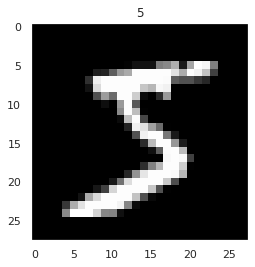

In [ ]:
plt.imshow(image, "gray")
plt.title(y_train[0])
plt.grid(False)
plt.show()

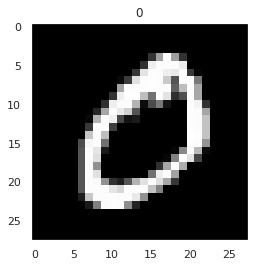

In [ ]:
plt.imshow(image, 'gray')
plt.grid(False)
plt.title(y_train[1])
plt.show()

신경망에 넣을 준비 - 준비할 신경망은 Fully Connected Layer

데이터가 1차원 데이터 형태여야 한다. ( flatten )

In [ ]:
image = image.reshape(-1)
image.shape

(784,)

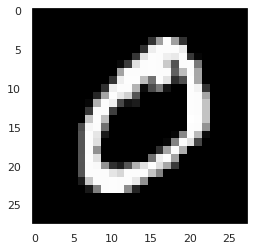

In [ ]:
image_return = image.reshape(28, 28)
plt.imshow(image_return, "gray")
plt.grid(False)
plt.show()

MNIST 신경망 만들기 - Fully Connected 방식

In [ ]:
# 활성화 함수 - 시그모이드

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 테스트 데이터 가져오기
def get_test_data():
  # (10000, 784 만들기)
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  image_size = x_test.shape[0]
  x_test_reshaped = x_test.reshape(image_size, -1)

  return x_test_reshaped

# 훈련된 신경망 가져오기
def init_network():
  import pickle
  with open("./sample_weight.pkl", "rb") as f:
    network = pickle.load(f)

  return network

# 예측함수 만들기
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  # 구현시 발생하는 대부분의 오류는 shape 때문.
  # 1. 각 층은 입력되는 값과 해당층의 가중치를 곱하고 편향을 더한다.
  # 2. (1)에 계산된 값에 활성화 함수를 적용하고 다음 층으로 넘긴다.

  # Layer1 계산 ( 입력 : x )
  a1 = np.dot(x, W1) + b1
  a1 = sigmoid(a1)

  # Layer2 계산 ( 입력 : a1 )
  a2 = np.dot(a1, W2) + b2
  a2 = sigmoid(a2)

  # Layer3 계산 ( 입력 : a2 )
  a3 = np.dot(a2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
x, y = get_test_data()

network = init_network()

accuracy_count = 0 # 맞춘 갯수

for i in range(len(x)):
  pred = predict(network, x[i])
  pred = np.argmax(pred) #  확률이 가장 높은 것의 인덱스

  if pred == y[i]:
    accuracy_count += 1

print(float(accuracy_count) / el)

ValueError: ignored

위 처럼 했을 때 단점 - 10000장을 한 장씩 검사한다.

그래서 batch를 사용한다. ( 랜덤으로 자르면 : 미니 batch )

배치의 종류에 따라서 경사하강법의 종류가 달라진다.   
GD - batch 사용.  
SGC - 미니 batch 사용.  ( 훨씬 많이 사용된다. )

In [ ]:
x, y = get_test_data()

network = init_network()

# 배치란 : 데이터의 묶음
# batch_size : 1 batch 당 들어있어야 하는 데이터의 갯수
# ex) 60000개의 데이터를 batch_size = 100 으로 묶으면 600개의 데이터가 생긴다.
# 배치를 활용해 60000개의 데이터를 모두 학습시켯으면, 1 epoch 이라고 한다.

In [ ]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size] # 순서대로 100개씩 데이터를 쪼갬
  y_batch = predict(network, X_batch) # 데이터를 100개씩 예측

  p = np.argmax(y_batch, axis=1) # 100개의 예측 데이터에서 가장 높은 값의 인덱스를 추출
  accuracy_cnt += np.sum( p == y[i : i + batch_size]) # 100개씩 정답의 합을 구함

print(float(accuracy_cnt) / len(X))

np.argmax의 axis가 1인 이유
 - softmax의 결과는 10개의 원소를 가진 1차원 배열.
 - 이 결과물이 100개씩 묶음 지어져 있다. ( batch )
 - np.argmax의 axis 1로 각 행별로 최대값의 인덱스를 구한다.  


데이터가 늘어나는 방향이 기준이 된다.  
데이터가 늘어나는 방향이 1이기에...